In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [23]:
#read after processing data
df = pd.read_csv('train_store.csv')
df

,Store,Date,Sales,Customers,Open,Promo,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,...,Assortment,CompetitionDistance,StoreType_a,StoreType_b,StoreType_c,StoreType_d,CompetitionOpenDate,IfCompetition,IfPromo2,IsPromoMonth
0,1,2015-07-31,5263,555,1,1,1.0,0.0,0.0,0.0,...,1,1270.0,0.0,0.0,1.0,0.0,2524,1,1,0
1,1,2015-07-30,5020,546,1,1,1.0,0.0,0.0,0.0,...,1,1270.0,0.0,0.0,1.0,0.0,2523,1,1,0
2,1,2015-07-29,4782,523,1,1,1.0,0.0,0.0,0.0,...,1,1270.0,0.0,0.0,1.0,0.0,2522,1,1,0
3,1,2015-07-28,5011,560,1,1,1.0,0.0,0.0,0.0,...,1,1270.0,0.0,0.0,1.0,0.0,2521,1,1,0
4,1,2015-07-27,6102,612,1,1,1.0,0.0,0.0,0.0,...,1,1270.0,0.0,0.0,1.0,0.0,2520,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,2013-05-01,4771,339,1,0,1.0,0.0,0.0,0.0,...,3,5350.0,0.0,0.0,0.0,1.0,120,1,1,0
1017205,1115,2013-04-01,4540,326,1,0,1.0,0.0,0.0,0.0,...,3,5350.0,0.0,0.0,0.0,1.0,90,1,1,0
1017206,1115,2013-03-01,4297,300,1,0,1.0,0.0,0.0,0.0,...,3,5350.0,0.0,0.0,0.0,1.0,59,1,0,1
1017207,1115,2013-02-01,3697,305,1,0,1.0,0.0,0.0,0.0,...,3,5350.0,0.0,0.0,0.0,1.0,31,1,0,0


In [24]:
df = df.drop(columns=['MonthAbb'])

In [25]:
df['Date'] = pd.to_datetime(df['Date'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 30 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   Date                 1017209 non-null  datetime64[ns]
 2   Sales                1017209 non-null  int64         
 3   Customers            1017209 non-null  int64         
 4   Open                 1017209 non-null  int64         
 5   Promo                1017209 non-null  int64         
 6   StateHoliday_0       1017209 non-null  float64       
 7   StateHoliday_a       1017209 non-null  float64       
 8   StateHoliday_b       1017209 non-null  float64       
 9   StateHoliday_c       1017209 non-null  float64       
 10  Day_1_OfWeek         1017209 non-null  float64       
 11  Day_2_OfWeek         1017209 non-null  float64       
 12  Day_3_OfWeek         1017209 non-null  float64       
 1

In [11]:
df

,Store,Date,Sales,Customers,Open,Promo,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,...,Assortment,CompetitionDistance,StoreType_a,StoreType_b,StoreType_c,StoreType_d,CompetitionOpenDate,IfCompetition,IfPromo2,IsPromoMonth
0,1,2015-07-31,5263,555,1,1,1.0,0.0,0.0,0.0,...,1,1270.0,0.0,0.0,1.0,0.0,2524,1,1,0
1,1,2015-07-30,5020,546,1,1,1.0,0.0,0.0,0.0,...,1,1270.0,0.0,0.0,1.0,0.0,2523,1,1,0
2,1,2015-07-29,4782,523,1,1,1.0,0.0,0.0,0.0,...,1,1270.0,0.0,0.0,1.0,0.0,2522,1,1,0
3,1,2015-07-28,5011,560,1,1,1.0,0.0,0.0,0.0,...,1,1270.0,0.0,0.0,1.0,0.0,2521,1,1,0
4,1,2015-07-27,6102,612,1,1,1.0,0.0,0.0,0.0,...,1,1270.0,0.0,0.0,1.0,0.0,2520,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,2013-05-01,4771,339,1,0,1.0,0.0,0.0,0.0,...,3,5350.0,0.0,0.0,0.0,1.0,120,1,1,0
1017205,1115,2013-04-01,4540,326,1,0,1.0,0.0,0.0,0.0,...,3,5350.0,0.0,0.0,0.0,1.0,90,1,1,0
1017206,1115,2013-03-01,4297,300,1,0,1.0,0.0,0.0,0.0,...,3,5350.0,0.0,0.0,0.0,1.0,59,1,0,1
1017207,1115,2013-02-01,3697,305,1,0,1.0,0.0,0.0,0.0,...,3,5350.0,0.0,0.0,0.0,1.0,31,1,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 30 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   Date                 1017209 non-null  datetime64[ns]
 2   Sales                1017209 non-null  float64       
 3   Customers            1017209 non-null  int64         
 4   Open                 1017209 non-null  int64         
 5   Promo                1017209 non-null  int64         
 6   StateHoliday_0       1017209 non-null  float64       
 7   StateHoliday_a       1017209 non-null  float64       
 8   StateHoliday_b       1017209 non-null  float64       
 9   StateHoliday_c       1017209 non-null  float64       
 10  Day_1_OfWeek         1017209 non-null  float64       
 11  Day_2_OfWeek         1017209 non-null  float64       
 12  Day_3_OfWeek         1017209 non-null  float64       
 1

In [14]:
df = df.set_index('Date')

<AxesSubplot: xlabel='Date'>

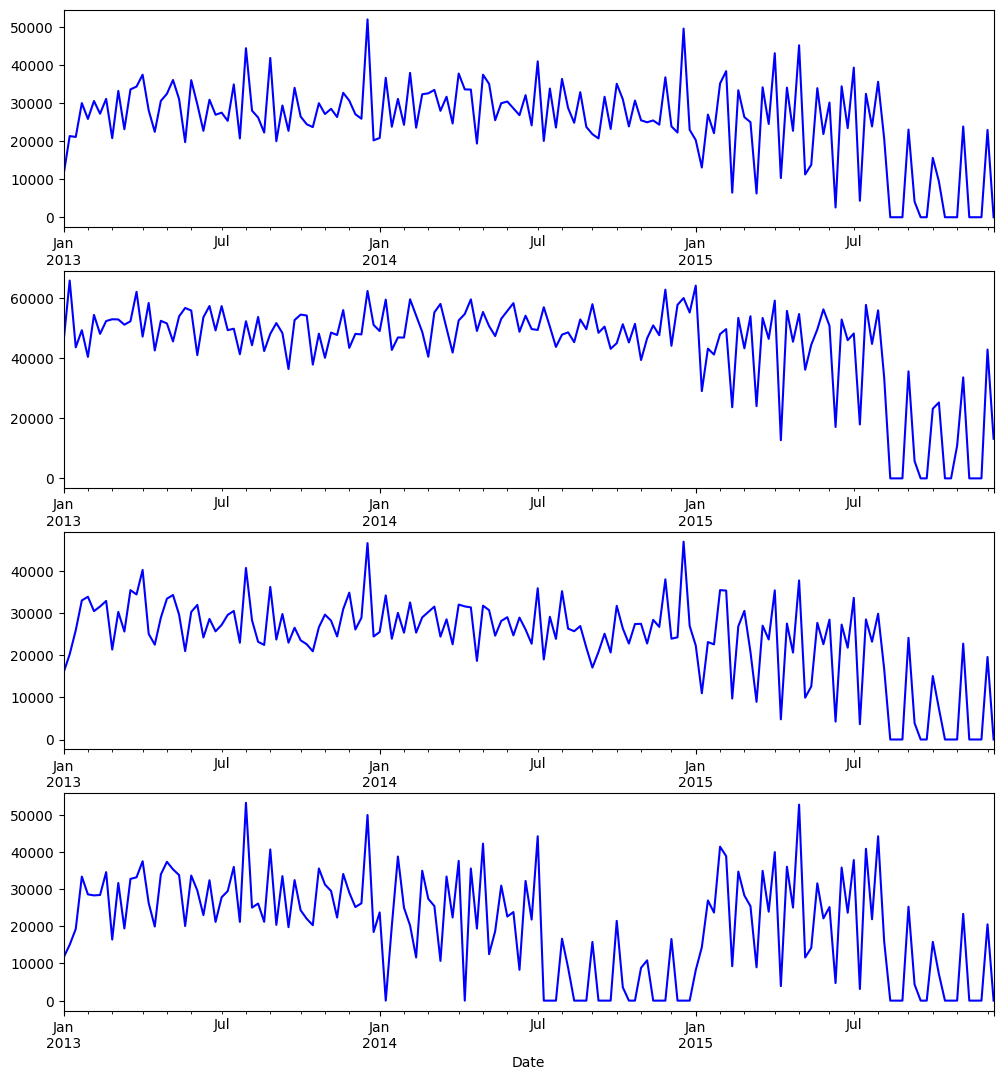

In [16]:
# preparation: input should be float type
df['Sales'] = df['Sales'] * 1.0

# store types
sales_a = df[df.Store == 2]['Sales']
sales_b = df[df.Store == 85]['Sales'].sort_index(ascending = True) # solve the reverse order
sales_c = df[df.Store == 1]['Sales']
sales_d = df[df.Store == 13]['Sales']

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

# store types
sales_a.resample('W').sum().plot(color = 'Blue', ax = ax1)
sales_b.resample('W').sum().plot(color = 'Blue', ax = ax2)
sales_c.resample('W').sum().plot(color = 'Blue', ax = ax3)
sales_d.resample('W').sum().plot(color = 'Blue', ax = ax4)

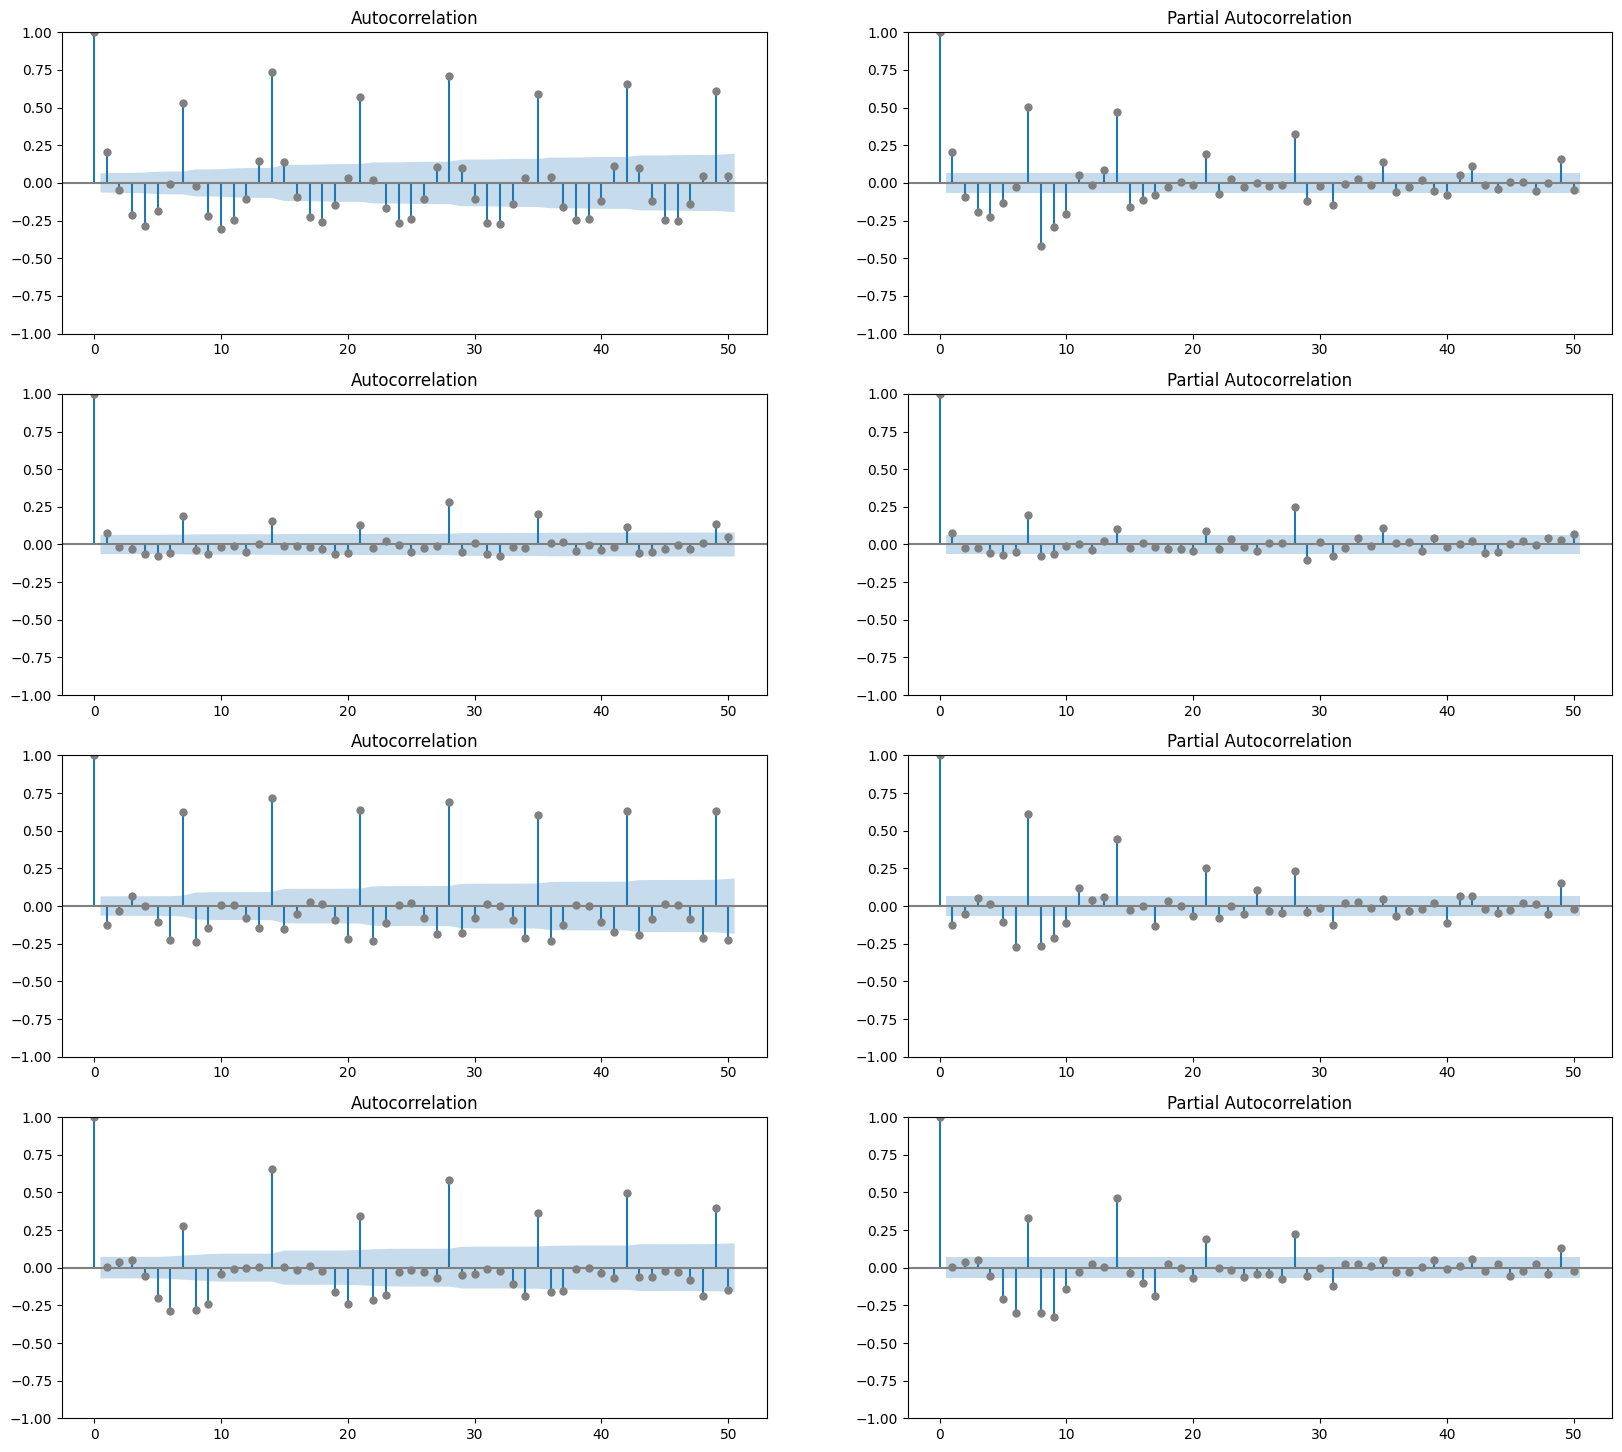

In [21]:
# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# figure for subplots
plt.figure(figsize = (20, 18))

# acf and pacf for A
plt.subplot(421); plot_acf(sales_a, lags = 50, ax = plt.gca(), color = 'Grey')
plt.subplot(422); plot_pacf(sales_a, lags = 50, ax = plt.gca(), color = 'Grey')

# acf and pacf for B
plt.subplot(423); plot_acf(sales_b, lags = 50, ax = plt.gca(), color = 'Grey')
plt.subplot(424); plot_pacf(sales_b, lags = 50, ax = plt.gca(), color = 'Grey')

# acf and pacf for C
plt.subplot(425); plot_acf(sales_c, lags = 50, ax = plt.gca(), color = 'Grey')
plt.subplot(426); plot_pacf(sales_c, lags = 50, ax = plt.gca(), color = 'Grey')

# acf and pacf for D
plt.subplot(427); plot_acf(sales_d, lags = 50, ax = plt.gca(), color = 'Grey')
plt.subplot(428); plot_pacf(sales_d, lags = 50, ax = plt.gca(), color = 'Grey')

plt.show()